# 掌控板的内置输出设备

    描述：掌控板内置了OLED屏，LED（3个）、蜂鸣器等输出设备。
    
    实现：调用pinpong库中的相关语句，分别控制掌控板各种输出设备的状态。

## 1.公共部分

首先需要导入库。

注意：第一次导入库时，电脑将通过串口给掌控板烧录一个固件，背后的LED灯将快速闪烁。烧录成功后，LED的闪烁频率将变慢。

In [1]:
# -*- coding: UTF-8 -*-
#实验效果：控制掌控板板载RGB灯
#接线：使用windows或linux电脑连接一块掌控板主控板

import time
from pinpong.board import Board
from pinpong.extension.handpy import *

Board("handpy").begin()#初始化，选择板型和端口号，不输入端口号则进行自动识别
#Board("handpy","COM36").begin()   #windows下指定端口初始化
#Board("handpy","/dev/ttyACM0").begin()   #linux下指定端口初始化
#Board("handpy","/dev/cu.usbmodem14101").begin()   #mac下指定端口初始化T").begin()   #mac下指定端口初始化
                             #显示画面


  __________________________________________
 |    ____  _       ____                    |
 |   / __ \(_)___  / __ \____  ____  ____ _ |
 |  / /_/ / / __ \/ /_/ / __ \/ __ \/ __ `/ |
 | / ____/ / / / / ____/ /_/ / / / / /_/ /  |
 |/_/   /_/_/ /_/_/    \____/_/ /_/\__, /   |
 |   v0.5.2  Designed by DFRobot  /____/    |
 |__________________________________________|
 
[01] Python3.8.3 Windows-10-10.0.22621-SP0 Board: HANDPY
selected -> board: HANDPY serial: COM3
[10] Opening COM3
[32] Firmata ID: 2.9
[22] Arduino compatible device found and connected to COM3
[40] Retrieving analog map...
[42] Auto-discovery complete. Found 40 Digital Pins and 16 Analog Pins
------------------------------
All right. PinPong go...
------------------------------


## 2.输出设备的控制

不同的设备，需要导入pinpong库中不同的模块。

### 2.1 OLED显示

“oled.DispChar”是最常用的语句。

In [4]:
oled.DispChar('你好世界', 38, 0)         #先写入缓存区，在(38,0)处显示'你好世界'
oled.DispChar('hello,world', 32, 16)     #先写入缓存区，在(32,16)处显示'hello,world'
oled.DispChar('안녕하세요', 35, 32)         #先写入缓存区，在(35,32)处显示'안녕하세요'
oled.DispChar('こんにちは世界', 24, 48)  #先写入缓存区，在(24,48)处显示'こんにちは世界'
oled.show()                              #显示画面

“oled.fill”表示清屏。

In [3]:
oled.fill(0) #清屏黑色填0，白色填1
oled.show() 

更多的功能如下。

In [ ]:
'''其他屏幕控制的方法'''
#oled.DispChar("PinPong库",1)    #屏幕显示"pinpong库"在第一行
#oled.DispChar("pinpong库", 42, 22)   #屏幕显示"pinpong库"在x,y坐标处，x:0-127,y:0-63
#oled.Bitmap(0,0,50,50,"E:\\PinPong\\default.png")  #依次是显示的坐标X,Y, 显示的宽和高，图片路径
#oled.chear(1)   #屏幕清除第一行的内容,参数1,2,3,4
#oled.fill(0)    #清屏黑色填0，白色填1
#oled.rotation(0)   #屏幕旋转0°或者180°
#oled.pixel(0,0)    #在坐标x,y画点
#oled.set_line_width(1)  #设置线宽范围 1 - 128
#oled.line(0,0,127,63)  #划线，依次是起点坐标x1,y1和终点坐标x2,y2
#oled.circle(63, 31, 20)    #画圆，依次是坐标x, y和 半径, 不填充
#oled.fill_circle(63, 31, 20)   #画圆，依次是坐标x, y和 半径, 填充
#oled.rect(0,0, 63, 31)   #画矩形，依次是起点坐标x, y, 宽，高, 不填充
#oled.fill_rect(0,0, 63, 31)    #画矩形，依次是起点坐标x, y, 宽，高, 填充
#oled.show()    #显示生效，所有屏幕操作执行完成后调用show才会执行

### 2.2 LED控制
掌控板自带3个LED，编号从0开始。控制LED只需要更改RGB三个参数的值即可，参数范围：0-255。

In [11]:
rgb[0] = (255, 0, 0)  # 设置为红色，全亮度
rgb[1] = (0, 128, 0)  # 设定为绿色，一半亮度
rgb[2] = (0, 0, 64)   # 设置为蓝色，四分之一亮度
rgb.write()

关闭LED灯方式一

In [9]:
rgb.fill((0,0,0))
rgb.write()

关闭LED灯方式二，-1代表3个灯(可以填灯号0,1,2)
设置LED灯光亮度

In [18]:
rgb.disable(-1)                                       #关闭LED灯，-1代表3个灯(可以填灯号0,1,2)
time.sleep(1)
rgb.brightness(2)                                     #设置LED灯的亮度，范围0-9
rgb[2] = (0, 0, 64)                                
rgb.write()
time.sleep(1)
print(rgb.brightness()) 

2


### 2.3 蜂鸣器控制

掌控板自带蜂鸣器，可以调出简单的音乐。

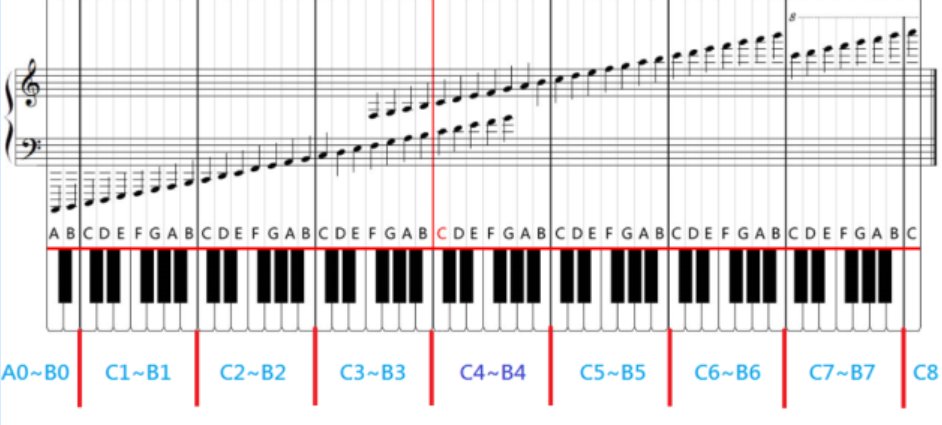

In [2]:
tune = ["C4:4", "D4:4", "E4:4", "C4:4", "C4:4", "D4:4", "E4:4", "C4:4",
        "E4:4", "F4:4", "G4:8", "E4:4", "F4:4", "G4:8"]        #G4:8冒号后面的数字说明：1：1/4拍；2：1/2拍；3：3/4拍；4：1拍；8：2拍依次类推
music.play(tune)                #播放自编乐谱

In [3]:
music.stop()   #停止播放音乐

**注：**运行到这里，如果需要运行下面的程序或者关闭窗口，建议请先进行“restart Kernel”或者拔插掌控板。